<a href="https://colab.research.google.com/github/nairsatish/8001-related/blob/main/Cell_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook was created to help with connection info when making network models
### Given a volume of cells researchers report cell connections in a few different methods this notebook was made to help find the correct number of connections a cell should get

## If you just want to check how to have proper connectivity then skip the first things

### First we need to figure out the cell density of a 300um sphere in our network. We do this because it is known the a cell can normally only connect to another cell a max distance of 300um. For the amygdala you have around 72000 cells in a 1400um^3 area (2,744,000,000 um volume)

In [ ]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import HBox,VBox
from IPython.display import display
layout = widgets.Layout(width='auto', height='40px') #set width and height

volume_of_sphere = ((4/3)*(np.pi)*(300**3)) # eq for volume of a sphere
total_cell_number = widgets.FloatText(value=72000,description='Cell number:',disabled=False, display='flex',flex_flow='column',align_items='stretch',layout = layout)
total_network_size = widgets.FloatText(value=2744000000,description='Volume (um):',disabled=False,display='flex',flex_flow='column',align_items='stretch',layout = layout)
do_math = widgets.Button(description="Calculate",icon='history',button_style='primary',layout = layout)

def find_cell_number(btn):
    global cell_count_in_sphere,PN_A,PN_C,PN,PV,SOM
    cell_count_in_sphere = int((total_cell_number.value/(total_network_size.value)*volume_of_sphere))
    print("Total cell count in 300um sphere is",cell_count_in_sphere)
    # cell amounts based off biology data
    PN_A = int(cell_count_in_sphere * 0.569)
    PN_C = int(cell_count_in_sphere * 0.231)
    PN = PN_A + PN_C
    PV = int(cell_count_in_sphere * 0.1)
    SOM = int(cell_count_in_sphere * 0.1)

ui = HBox([total_cell_number,total_network_size,do_math])
cell_count_in_sphere = do_math.on_click(find_cell_number)
display(ui)



Total cell count in 300um sphere is 2967


### Next we will compute a Gaussian function which we will later optimize. A Guassian function has a P_max and sigma value which together make a bell curve. For more information about this check out the BMTK paper https://www.biorxiv.org/content/10.1101/2021.03.31.437553v2.full

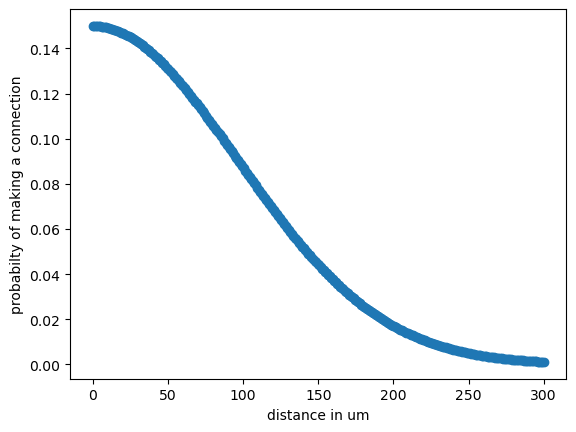

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#plots a graph of the gaus
distance = np.linspace(0,300,300) # unit is um

def gaus_connection(distance, p_max=0.15, sigma=95.98): # p_max, and sigma are examples from bmtk paper will need to change
    top = (distance) ** 2
    bottom = 2 * (sigma ** 2)
    prob = p_max * np.exp(-1*(top/bottom))
    return prob

prob = []
for i in range(len(distance)):
    p = gaus_connection(distance[i])
    prob.append(p)

plt.xlabel("distance in um")
plt.ylabel("probabilty of making a connection")
plt.scatter(distance,prob)
plt.show()

### Next to figure out how many connections we expect from this function we will do some math! This example code uses the curve in the above graph. This math was checked by the 8001 class so I am fairly confident that the math is correct.

In [ ]:
import scipy.integrate as intergrate

# Total # of cells of type B connecting to a cell of Type A
# at the middle of the sphere = Integ prob of connection of A to B x 4* pi* r2 dr) from 0 to 300 um.
def integrand(x,cell_type_density_in_sphere):
    p = gaus_connection(x)
    surface_area = (4 * np.pi * (x**2))
    V = ((4/3)*(np.pi)*(300**3))
    I = p * (surface_area * (cell_type_density_in_sphere/(V)))
    return I

def calculate_intergal_PN_A(btn):
    print("Doing math for PN_A cell")
    cell_type_density_in_sphere = PN_A #
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    print("The total number of connections made with a cell density of %d in a 300 um sphere to a single cell in the middle "
            "of the sphere is %d" %(cell_type_density_in_sphere, num))
def calculate_intergal_PN_C(btn):
    print("Doing math for PN_C cell")
    cell_type_density_in_sphere = PN_C #
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    print("The total number of connections made with a cell density of %d in a 300 um sphere to a single cell in the middle "
            "of the sphere is %d" %(cell_type_density_in_sphere, num))
def calculate_intergal_PV(btn):
    print("Doing math for PV cell")
    cell_type_density_in_sphere = PV #
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    print("The total number of connections made with a cell density of %d in a 300 um sphere to a single cell in the middle "
            "of the sphere is %d" %(cell_type_density_in_sphere, num))
def calculate_intergal_SOM(btn):
    print("Doing math for SOM cell")
    cell_type_density_in_sphere = SOM #
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    print("The total number of connections made with a cell density of %d in a 300 um sphere to a single cell in the middle "
            "of the sphere is %d" %(cell_type_density_in_sphere, num))

do_math_PN_A = widgets.Button(description="PN_A",icon='history',button_style='primary',layout = layout)
do_math_PN_C = widgets.Button(description="PN_C",icon='history',button_style='primary',layout = layout)
do_math_PV = widgets.Button(description="PV",icon='history',button_style='primary',layout = layout)
do_math_SOM = widgets.Button(description="SOM",icon='history',button_style='primary',layout = layout)

do_math_PN_A.on_click(calculate_intergal_PN_A)
do_math_PN_C.on_click(calculate_intergal_PN_C)
do_math_PV.on_click(calculate_intergal_PV)
do_math_SOM.on_click(calculate_intergal_SOM)

ui = VBox([HBox([do_math_PN_A,do_math_PN_C]), HBox([do_math_PV,do_math_SOM])])
display(ui)


Doing math for PN_A cell
The total number of connections made with a cell density of 1688 in a 300 um sphere to a single cell in the middle of the sphere is 30


### Now lets say you have data that is given in percent connectivity. You need to find a gaussian function that gives you a the same level of connectivity as that precent given.To do this we first come up with a function that mimics the percent connectivity. There is most likely a way to solve for this, but instead we just guess and check function using the slider below.

In [ ]:
P_max = widgets.FloatSlider(value=0.15,min=0,max=1,step=0.01,description='P_max:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f')
Sigma = widgets.FloatSlider(value=95,min=0,max=200,step=5,description='Sigma:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f')


def calculate_intergal_PN_A(btn):
    def gaus_connection(distance, p_max=P_max.value, sigma=Sigma.value):
        top = (distance) ** 2
        bottom = 2 * (sigma ** 2)
        prob = p_max * np.exp(-1*(top/bottom))
        return prob
    def integrand(x,cell_type_density_in_sphere):
        p = gaus_connection(x)
        surface_area = (4 * np.pi * (x**2))
        V = ((4/3)*(np.pi)*(300**3))
        I = p * (surface_area * (cell_type_density_in_sphere/(V)))
        return I

    def integrand2(x):
        p = gaus_connection(x)
        output = p/300
        return output
    print("Doing math for PN_A cell")
    cell_type_density_in_sphere = PN_A #
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    num2, error = intergrate.quad(integrand2, 0, 300)
    print("This Gaussian function mimics percent connecitivy of %.2f precent" %(num2*100))
    print("With that new Gaussian function you would expect to have %d connections"%(num))

def calculate_intergal_PN_C(btn):
    def gaus_connection(distance, p_max=P_max.value, sigma=Sigma.value):
        top = (distance) ** 2
        bottom = 2 * (sigma ** 2)
        prob = p_max * np.exp(-1*(top/bottom))
        return prob
    def integrand(x,cell_type_density_in_sphere):
        p = gaus_connection(x)
        surface_area = (4 * np.pi * (x**2))
        V = ((4/3)*(np.pi)*(300**3))
        I = p * (surface_area * (cell_type_density_in_sphere/(V)))
        return I

    def integrand2(x):
        p = gaus_connection(x)
        output = p/300
        return output
    print("Doing math for PN_C cell")
    cell_type_density_in_sphere = PN_C #
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    num2, error = intergrate.quad(integrand2, 0, 300)
    print("This Gaussian function mimics percent connecitivy of %.2f precent" %(num2*100))
    print("With that new Gaussian function you would expect to have %d connections"%(num))

def calculate_intergal_PV(btn):
    def gaus_connection(distance, p_max=P_max.value, sigma=Sigma.value):
        top = (distance) ** 2
        bottom = 2 * (sigma ** 2)
        prob = p_max * np.exp(-1*(top/bottom))
        return prob
    def integrand(x,cell_type_density_in_sphere):
        p = gaus_connection(x)
        surface_area = (4 * np.pi * (x**2))
        V = ((4/3)*(np.pi)*(300**3))
        I = p * (surface_area * (cell_type_density_in_sphere/(V)))
        return I

    def integrand2(x):
        p = gaus_connection(x)
        output = p/300
        return output
    print("Doing math for PV cell")
    cell_type_density_in_sphere = PV # means looking at FSI-cell connection
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    num2, error = intergrate.quad(integrand2, 0, 300)
    print("This Gaussian function mimics percent connecitivy of %.2f precent" %(num2*100))
    print("With that new Gaussian function you would expect to have %d connections"%(num))
def calculate_intergal_SOM(btn):
    def gaus_connection(distance, p_max=P_max.value, sigma=Sigma.value):
        top = (distance) ** 2
        bottom = 2 * (sigma ** 2)
        prob = p_max * np.exp(-1*(top/bottom))
        return prob
    def integrand(x,cell_type_density_in_sphere):
        p = gaus_connection(x)
        surface_area = (4 * np.pi * (x**2))
        V = ((4/3)*(np.pi)*(300**3))
        I = p * (surface_area * (cell_type_density_in_sphere/(V)))
        return I

    def integrand2(x):
        p = gaus_connection(x)
        output = p/300
        return output
    print("Doing math for SOM cell")
    cell_type_density_in_sphere = SOM #
    num, error = intergrate.quad(integrand, 0, 300,args=(cell_type_density_in_sphere))
    num2, error = intergrate.quad(integrand2, 0, 300)
    print("This Gaussian function mimics percent connecitivy of %.2f precent" %(num2*100))
    print("With that new Gaussian function you would expect to have %d connections"%(num))

do_math_PN_A = widgets.Button(description="PN_A",icon='history',button_style='primary',layout = layout)
do_math_PN_C = widgets.Button(description="PN_C",icon='history',button_style='primary',layout = layout)
do_math_PV = widgets.Button(description="PV",icon='history',button_style='primary',layout = layout)
do_math_SOM = widgets.Button(description="SOM",icon='history',button_style='primary',layout = layout)

do_math_PN_A.on_click(calculate_intergal_PN_A)
do_math_PN_C.on_click(calculate_intergal_PN_C)
do_math_PV.on_click(calculate_intergal_PV)
do_math_SOM.on_click(calculate_intergal_SOM)

ui = VBox([HBox([P_max,Sigma]),HBox([do_math_PN_A,do_math_PN_C]), HBox([do_math_PV,do_math_SOM])])
display(ui)


Doing math for PN_A cell
This Gaussian function mimics percent connecitivy of 5.94 precent
With that new Gaussian function you would expect to have 29 connections


### Now once you know how many connections each cell recieves you then need to make sure your code matches the number

#### Since this is just an example we will be using BMTK example templates so we dont have to mess with downloading other ones

In [ ]:
from bmtk.builder import NetworkBuilder
from bmtk.builder.auxi.node_params import positions_list, xiter_random
from bmtk.utils.sim_setup import build_env_bionet
import numpy as np
import os

try:
    os.removedirs("network")
except:
    pass


net = NetworkBuilder("Test_net")

net.add_nodes(
    N=800, pop_name='Pyr',
    ei='e',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc'
)

net.add_nodes(
    N=200, pop_name='PV',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='472912177_fit.json',
    morphology='Pvalb_470522102_m.swc'
)

def connecting_function(source, target, prob):
    sid = source.node_id
    tid = target.node_id
    if np.random.uniform() > prob:
        return 0
    else:
        return 1

conn = net.add_edges(source={'pop_name': 'Pyr'}, target={'pop_name': 'Pyr'},
                     iterator='one_to_one',
                     connection_rule=connecting_function,
                     connection_params={'prob': 0.02},
                     syn_weight=1,
                     delay=0.1,
                     dynamics_params='AMPA_ExcToExc.json',
                     model_template='exp2syn',
                     distance_range=[-10000.0, 10000.0],
                     target_sections=['apical'])

conn = net.add_edges(source={'pop_name': 'Pyr'}, target={'pop_name': 'PV'},
                     iterator='one_to_one',
                     connection_rule=connecting_function,
                     connection_params={'prob': 0.20},
                     syn_weight=1,
                     delay=0.1,
                     dynamics_params='AMPA_ExcToExc.json',
                     model_template='exp2syn',
                     distance_range=[-10000.0, 10000.0],
                     target_sections=['apical'])

conn = net.add_edges(source={'pop_name': 'PV'}, target={'pop_name': 'Pyr'},
                     iterator='one_to_one',
                     connection_rule=connecting_function,
                     connection_params={'prob': 0.20},
                     syn_weight=1,
                     delay=0.1,
                     dynamics_params='AMPA_ExcToExc.json',
                     model_template='exp2syn',
                     distance_range=[-10000.0, 10000.0],
                     target_sections=['apical'])

conn = net.add_edges(source={'pop_name': 'PV'}, target={'pop_name': 'PV'},
                     iterator='one_to_one',
                     connection_rule=connecting_function,
                     connection_params={'prob': 0.20},
                     syn_weight=1,
                     delay=0.1,
                     dynamics_params='AMPA_ExcToExc.json',
                     model_template='exp2syn',
                     distance_range=[-10000.0, 10000.0],
                     target_sections=['apical'])

net.build()
net.save(output_dir='network')

build_env_bionet(base_dir='./',
                network_dir='./network',
                config_file='config.json',
                tstop=100, dt=0.1,
                report_vars=['v'],
                components_dir='biophys_components',
                v_init=-70,
                compile_mechanisms=False,
                overwrite_config=True)





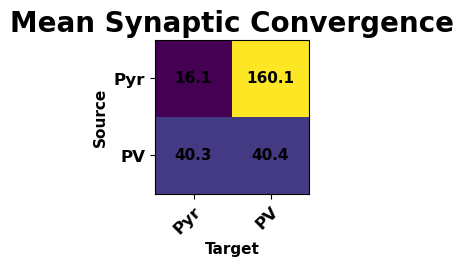

In [ ]:
from bmtool import bmplot
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)


bmplot.convergence_connection_matrix(config="config.json",sources='Test_net',targets='Test_net', sids="pop_name", tids="pop_name",no_prepend_pop=True)
plt.show()

# When building a homogenous network you can first build the network at a small scale such as 1000 cellls like shown above. Once you are happy with your convergence you can then take the connection prob and divide it by the scale of the network. So that the connection prob is half at 2000 cells and so on. This will allow the user to build any size homogenous network and always have the same connvergence.

# For Distance depended models you should be able to use the Gaussian testing code above making sure that the cell types each have the right density and convergence. You can then use bmtools to test convergence like above.